Text(0.5, 0, 'Time (s)')

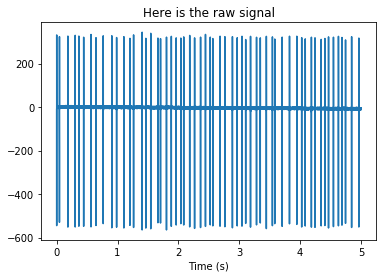

In [3]:
#This code is an example for Spike Detection with electroPy
#I stole some code from Marcos Duarte, he nicely coded the findpeaks function from Matlab into Python !

#First the modules we need 
import neo 
from matplotlib import pyplot as plt
import numpy as np 
import electroPy.Detect_Peaks as peaks


#File location
file = r'U:\RAW DATA\data for python course\PC_spiking.wcp'

#Create a reader
reader = neo.WinWcpIO(file)
#Call the block
bl = reader.read_block()

#Call the the time vector, the signal and the sampling rate
time = bl.segments[0].analogsignals[0].times
sampling_rate = float(bl.segments[0].analogsignals[0].sampling_rate)

sig=bl.segments[0].analogsignals[0].magnitude
#Remove the leak
sig = sig-np.mean(sig[0:1000])

#For faster computation, let's take only the first 5 seconds of the signal
limit = np.ravel(np.where(time>=5.0))[0]

sig = np.ravel(sig[0:limit]).astype('float')
time = np.ravel(time[0:limit])

plt.figure()
plt.title("Here is the raw signal")
plt.plot(time,sig)
plt.xlabel("Time (s)")

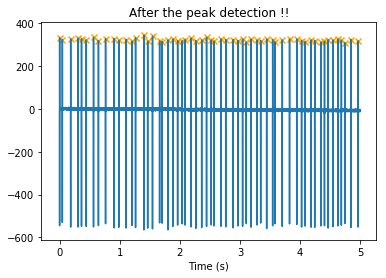

In [4]:
#Determine the peak indexes... Yes, it's just a line. 
#mph = minimum peak height, mpd = minimum peak distance
indexes = peaks.indexes(sig,mph=50,mpd=100)

plt.figure()
plt.title("After the peak detection !!")
plt.plot(time, sig)
plt.xlabel("Time (s)")

for index in indexes:
    plt.scatter(time[index],sig[index],marker='x',color='orange')   

In [5]:
#Now you have the indexes of the spikes in a single 1-D array for further analysis
print (indexes)

[    42   2870  11534  19019  22793  27735  35284  40388  47795  56623
  61555  69009  75226  78984  87764  91576  96606 103978 106640 112765
 117735 122730 127500 130462 136599 141617 147744 152791 157703 160356
 167754 172733 180461 185388 190275 194086 199046 205218 209079 215295
 221516 223929 231522 239060 246564 251589 255237 261545 265247 271578
 275400 279136 284190 289318 292936 296591 302840 310269]


In [9]:
#If you want to extract the spike times :
spike_times = []
for index in indexes : 
    spike_times.append(float(time[index]))
    
print (spike_times)

[0.0006719999983033631, 0.045919999884063145, 0.1845439995340712, 0.30430399923170626, 0.3646879990792513, 0.4437599988796137, 0.5645439985746634, 0.6462079983684816, 0.7647199980692676, 0.9059679977126507, 0.984879997513417, 1.1041439972123044, 1.2036159969611617, 1.2637439968093531, 1.4042239964546752, 1.4652159963006852, 1.5456959960974928, 1.6636479957996926, 1.7062399956921581, 1.804239995444732, 1.8837599952439632, 1.9636799950421846, 2.039999994849495, 2.087391994729842, 2.185583994481931, 2.265871994279223, 2.363903994031716, 2.444655993827837, 2.523247993629411, 2.5656959935222403, 2.68406399322339, 2.7637279930222576, 2.8873759927100764, 2.9662079925110447, 3.044399992313629, 3.1053759921596793, 3.1847359919593146, 3.2834879917099897, 3.3452639915540203, 3.444719991302918, 3.544255991051614, 3.582863990954138, 3.7043519906474103, 3.8249599903429043, 3.945023990039772, 4.025423989836781, 4.083791989689416, 4.184719989434598, 4.243951989285051, 4.345247989029303, 4.406399988874